### Computer Vision - Fall 2021

**Lecturer:** Prof Yael Moses, IDC

**TA:** Eyal Friedman, IDC

**Submission date: 9.11.21** \
Note: in case you need an extenstion for any reason - you can submit it by 14.11.21.\
No extra extensions will be given.


## <span style="color:blue">Exercise 1  </span>

In this exercise you will practice basic image operation as loading, saving and displaying an image, getting familiar with 'numpy' and the benefits of vectorized operations in Python. This exercise contains 3 parts:

1. Image Convolution.
2. Implementing a classic Canny Edge Detector and answering questions.
3. Implementing Hough Transform 

## Submission guidelines:

1. Your **zip** should include the following files only:
    - ex1.ipynb  (**Or**  ex1.py for students who refuses to work with Jupiter Notebook). 
    - ex1_ID_ID.pdf (If you decieded not to answer on some of the questions in the notebook, you should submit it as a pdf file). 
   (Don't add the python code to that file.)
4. You may use any IDE as you want (Spyder, Jupyter Notebook, Pycharm, ect.).
5. Name the zip file **'ex1_ID_ID.zip'** and **do not** include any additional directories. 
6. Submit using *moodle*.
7. Submit on time!
8. You can submit this assignment in pairs (no triplets)
- **Important - if you submit in pairs, one should submit the howework and the other should submit a simple text file named: ID_ID.txt and nothing else.**


## Read the following instructions carefully:
1. Write **efficient vectorized** code. When you think you cannot use vectorized code, give a short explanation why.
2. You are responsible for the correctness of your code and should add as many tests as you see fit. Do not submit your tests, unless requested.
3. Use `python 3` and `numpy 1.18.5`. Changes of the configuration we provided are at your own risk. Before submitting the exercise, restart the kernel and run the notebook from start to finish to make sure everything works.
4. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. Any other imports are forbidden, unless been provided by us.
4. Your code must run without errors. Note,  **Code that fail to  run will not be graded.**
5. Document your code properly.
5. Go over Basic.py and MoreOnBasic.py - you can find there relevant python functions that will make your life easier.

## Honor Code:
The assignment is a basic tool for learning the material. You can probably find the solution on the web, however, you will not learn what you should learn from it. In addition, since we give grades on the assignment, using existing solutions will be considered dishonest.
In particular, you are not allowed to copy or use any code that solve the task. 
You are more than welcome to talk with your friends, but you are not allowed to give your code or answers and you are not allowed to use their code or answers. 
Remember – you take this course in order to learn.


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d

# specify the way plots behave in jupyter notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'

In [2]:
import platform
print("Python version: ", platform.python_version())
print("Numpy version: ", np.__version__)

Python version:  3.9.7
Numpy version:  1.21.3


Here we define a side-function for the plotting phase

In [3]:
def plot_conv_max(img, ker, zoom=False, annot=False):
    '''
    Returns the original image ('img'), along side the convolved image with 'ker'.
    parameters
    ----------
    img: a 2D array that contains a grey-level image.
    ker: a 2D array.
    
    zoom : bool, default: False
    Adds an additional zoom-in figure around the maximum value.
    
    annot : bool, default: False
    Creates annotations of the pixel values in the Zoom image'''
    conv = convolve2d(img, ker, mode='same')
    mx = np.unravel_index(conv.argmax(), shape=conv.shape)
    fig, ax = plt.subplots(1,3, figsize=(12,4))
    
    ax[0].imshow(img), ax[0].set_title('Original Image')
    ax[1].imshow(conv), ax[1].set_title('Convolved Image')
    
    if zoom:
        ax[2].imshow(conv), ax[2].set_title('Zoom Max Value')
        ax[2].set_xlim(mx[0]-4, mx[0]+4), ax[2].set_ylim(mx[1]-4, mx[1]+4)
        if annot:
            for i in range(mx[0]-3, mx[0]+4):
                for j in range(mx[1]-3, mx[1]+4):
                    if (i,j) == mx:
                        continue
                    ax[2].text(i,j, int(conv[i,j]), size=8, color='red', ha='center', va='center')
            ax[2].annotate(int(conv[mx]), mx, c='b', size=9, va='center', ha='center')
    else:
        ax[2].axis('off')

    fig.tight_layout()

## <span style="color:black">Section A: Convolution (16 pt)
In this part, you will need to write a function **convolvedImage = convolutionMask(img,mask)**  which gets a 2D np.array of an image and a convolution mask (Kernel) and output the convolved image with your mask. It also should plot  the original image and the convolved image side by side. Use captions on each image that indicates what you present. (Hint: see example in Additional_examples in Moodle)\
You may use the convolve2d function from scipy.signal.\
**Note:** Make sure that you understand the differences between correlation and convolution.\
Suggest a convolution mask for each of the 4 cases: 
    
1. Mask1:  a convolution mask (kernel)  that computes the sum of a 3x5 pixels around each pixel (height 3 and width 5). 
   
    
2. Mask2:  a convolution mask (kernel) of size *5×5* such that the maximal value over all possible grey level images (range 0 to 255) will be obtained in the center of a widnow that contains a white non-symmetric   **'+'** shape region surrounded by black pixels (see the region below).  Note, the rest of the image may contain any values.

    The  '+' shape region:\
    ``
     0    0    0    0    0 
    0    0   255   0    0 
    0   255  255  255  255 
    0    0   255   0    0 
    0    0    0    0    0    ``
     

3. Let '*' be a don't care value.\
    Mask3:  a mask as defined in  2 above  but for the following region:\
    ``  
    0    0     0    0    0
    0    *    255   *    0
    0   255   255  255  255
    0    0    255   0    0
    0    0     0    0    0
      ``
4. Maks 4: a convolution mask (kernel)  that computes a 2 pixel shift of the image to the left.\
    You can ignore the results along the border of the image.

**Submit your function below and the masks and results either below or in the PDF file**. 


In [4]:
img = cv2.imread('images/Church.jpg', cv2.IMREAD_GRAYSCALE)

In [5]:
# This function will be part your functions' test - do not change it
# You may add any helper function for your implementation and to write your code in the cell below

def test_A(imageName):
    img = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)

    convolvedImage1 = convolutionMask(img,mask1)
    
    convolvedImage2 = convolutionMask(img,mask2)
    
    convolvedImage3 = convolutionMask(img,mask3)
        
    convolvedImage4 = convolutionMask(img,mask4)

In [6]:
def convolutionMask(img,mask):
    return convolve2d(img, mask, mode='same', boundary='symm')

In [7]:
# Masks:

# Mask1
mask1 = np.ones((3,5))
mask1 /= mask1.sum()

#Mask2
mask2 = (np.zeros((5,5), dtype=int) - 1)
mask2[2,1:] = 1
mask2[[1,3],2] = 1
mask2 = np.flip(mask2)

#Mask3
mask3 = mask2.copy()
mask3[3,[1,3]] = 0  # After considering the flip

#Mask4
mask4 = np.array([[1,0,0,0,0]])

masks = [mask1, mask2, mask3, mask4]

Let us test test mask2 by first creating a 100x100 image with random noise, with the desired cross shape implemented in it in somewehere in the bottom right area of the image.

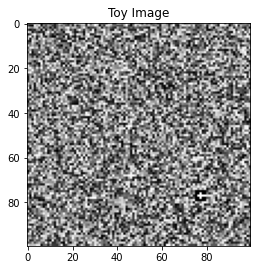

In [8]:
plt.figure(figsize=(4,5))

rands = np.random.randint(0, 256, size=(100,100))
toy = np.zeros((5,5))
toy[2,1:] = 255
toy[[1,3], 2] = 255
rands[-25:-20,-25:-20] = toy
plt.imshow(rands)
plt.title('Toy Image');

Let us visualize the convolved result per mask.
Note that we chose to ignore the max value in the first and last masks, as its meaningless.

<u>Remark</u> - You can generate different random noise by running the above cell again. 

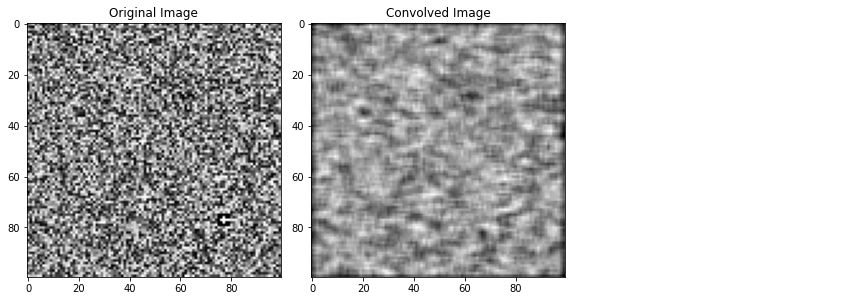

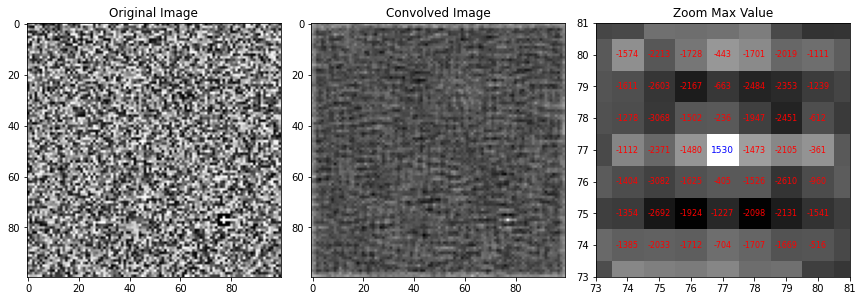

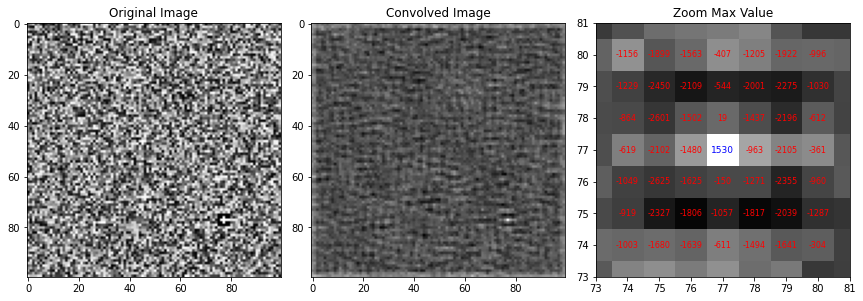

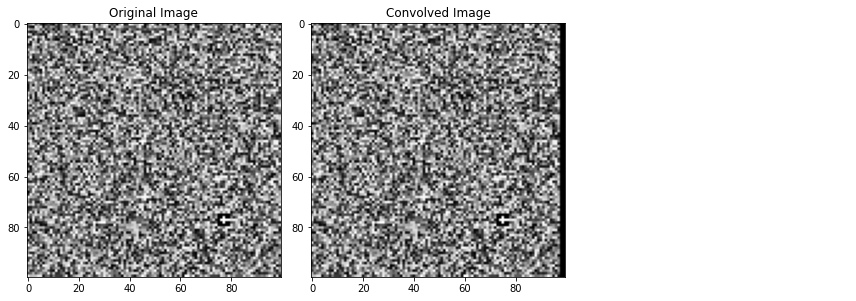

In [9]:
for mask, is_zoom in zip([mask1,mask2,mask3,mask4], [False,True,True,False]):
    plot_conv_max(rands, mask, zoom=is_zoom, annot=True)

In [10]:
img = cv2.imread('images/Church.jpg')[:,:,0]
test_A('images/Church.jpg')

# print and check your results - advicing you to check your code on trivial problems (toy problems)

## <span style="color:black"> Section B: Edge Detector (50 pt)

In this section, you will implement the classic Canny edge detector and Sobel edge detector, apply them and explore their paremeters. 

Reference: 
[F. J. Canny. A computational approach to edge detection. IEEE Trans. Pattern Analysis and Machine Intelligent (PAMI), 8(6):679-698, 1986.](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=4767851&casa_token=-KErvLLfyjQAAAAA:-Q-efDIF1sM3mJBrQfCZnqaPYftS4IspVi_9NR7kfmdx8AnFFmKSy5HnRjk2PpHpNR0VUOsw-ML4fw)


## <span style="color:black"> **B1 - Implement Canny**  
Write the function: **CannyEdges = Canny(img, sigma, L_th, H_th)**
- The output is a binary image: 1 for an edge pixel and 0 for the rest.
- Following are the function parameters:
    - *img*: a 2D array  that contains a  grey-level image. 
    - *sigma*: the gaussian std. 
    - *L_th*, *H_th*: the Low and high threholds of the algorithm.

Use the following steps:

1. Compute two kernels with the derivative of a Gaussian: G_dx, G_dy  = Deriv_Gauss_xy(sigma).\
   **Note**:\
    (i) See an example of how to define a mask given a function in  'AddionalExamples.ipynb'.\
    (ii) The mask_size should be around 6$\sigma$+1.\
    You can check and see if smaller or larger mask size affect the results.
   **A question for thought (not for submission)**: what is the expected sum of the elements in the kernel? 
    
2. Using these masks compute two matrixes, $I_x$ and $I_y$, with the derivatives of the image in the $x$ and in the $y$ directions, respectively:\
    **Ix, Iy = Grad_xy(img, sigma)**

3. Compute two matrices *G_orientation* and *G_magnitute* with the gradient  orientation and magnitude at each pixel:\
    **G_orientation, G_magnitude = Grad_orient_mag(Ix,Iy)**

4. Compute non-maximum suppression (thinning) into a matrix:\
    **G_thin = non_maximum_supression(G_magnitude, G_orientation)** 

    **Note**: For computing non-maximum suppression, edge orientation should be rounded to be one of four orientations:
    Gradients that are approximately horizontal, approximately vertical, and approximately one of the diagonals (see figure). ![](NMS-orientation.jfif)

5. Edge Tracking by Hysteresis: use the two thresholds, *L_th*, *H_th*, to put it all together and compute the canny edge detector. \
    The output should be a binary map where an edge pixel is 1 and the rest are 0:\
    **E = DoubleThreshold(L_th, H_th)** \
In order to get full credit, you will need to find an  **efficient vectorization code** (a single loop may be used only over edge pixels).  
**Hint**: For efficient vectorized code of the DoubleThreshold, you may want to use: (i) image threshold function; (ii) dilate function ; (iii) add images; (iv)  the function cv2.connectedComponents(img, connectivity=8). See slides of Class 2.



**Submit your functions and an example of one of the images**.

The desire output should look like that: <img src="canny_example.png" style="margin-left:auto; margin-right:auto"/>


Here we define all sub-functions.

In [11]:
def Gaussian_derv(x,y,sig):
    Gauss = (1/(2*np.pi*sig**2))*np.exp(-(np.square(x) + np.square(y))/(2*sig**2))
    Gx = Gauss * ((-x) / sig**2)
    Gy = Gauss * ((-y) / sig**2)
    return Gx, Gy

def Deriv_Gauss_xy(sig):
    l = 6 * round(sig) + 1
    ax = np.linspace(-(l-1)/2, (l-1)/2, l)
    
    xx, yy = np.meshgrid(ax,ax)
    G_dx, G_dy = Gaussian_derv(xx,yy,sig)
    return G_dx, G_dy

In [12]:
def Grad_xy(img, G_dx, G_dy):
    return convolve2d(img, G_dx, mode='same'), convolve2d(img, G_dy, mode='same')

In [13]:
def Grad_orient_mag(Ix, Iy):
    return round_deg_v(np.arctan2(Iy, Ix)), np.sqrt(Ix**2 + Iy**2)

In [14]:
def round_deg(theta):
    lin = np.pi / 8 
    if theta < 0:
        theta += np.pi
    
    if (0 <= theta < lin) or (np.pi - lin < theta <= np.pi):
        theta = 0
    elif (lin <= theta < np.pi/2 - lin):
        theta = 45
    elif (np.pi/2 - lin <= theta < np.pi/2 + lin):
        theta = 90
    else:
        theta = 135
        
    return theta

round_deg_v = np.vectorize(round_deg)  # For vectorized code :D

In [15]:
def non_maximum_supression(G_magnitude, G_orientation):
    supressed = np.zeros_like(G_magnitude)
    
    # Set up shifting matrices for vectorized code
    shft_left = np.array([[1,0,0]])
    shft_right = np.flip(shft_left)
    shft_up = shft_left.T
    shft_down = shft_right.T
    
    # Shift the magnitude matrix to all 8 directions around a pixel
    right_neighbor = convolve2d(G_magnitude, shft_left, mode='same', boundary='symm')
    left_neighbor = convolve2d(G_magnitude, shft_right, mode='same', boundary='symm')
    top_neighbor = convolve2d(G_magnitude, shft_down, mode='same', boundary='symm')
    bottom_neighbor = convolve2d(G_magnitude, shft_up, mode='same', boundary='symm')
    top_right_neighbor = convolve2d(bottom_neighbor, shft_left, mode='same', boundary='symm')
    bottom_left_neighbor = convolve2d(top_neighbor, shft_right, mode='same', boundary='symm')
    top_left_neighbor = convolve2d(bottom_neighbor, shft_right, mode='same', boundary='symm')
    bottom_right_neighbor = convolve2d(top_neighbor, shft_left, mode='same', boundary='symm')
    
    # Find biggest pixels in every relevat direction 
    biggest_0 = (G_orientation == 0) & (G_magnitude > right_neighbor) & (G_magnitude > left_neighbor)
    biggest_45 = (G_orientation == 45) & (G_magnitude > top_right_neighbor) & (G_magnitude > bottom_left_neighbor)
    biggest_90 = (G_orientation == 90) & (G_magnitude > top_neighbor) & (G_magnitude > bottom_neighbor)
    biggest_135 = (G_orientation == 135) & (G_magnitude > top_left_neighbor) & (G_magnitude > bottom_right_neighbor)
    
    supressed[biggest_0] = G_magnitude[biggest_0]
    supressed[biggest_45] = G_magnitude[biggest_45]
    supressed[biggest_90] = G_magnitude[biggest_90]
    supressed[biggest_135] = G_magnitude[biggest_135]
    return (supressed - supressed.min()) / (supressed.max() - supressed.min())  # Return it between 0 and 1 for fixed threshold

**Eyal** - question regrarding the function above:
Was creating 8 different matrices and comparing them, really more effective than `i,j` iterations? I know numpy is looping under the hood with `C` language, but in that case, what would you say is more effective? Was that an overkill? Thanks!

In [16]:
def DoubleThreshold(G_thin,L_th,H_th):
    assert (0 <= L_th <= H_th <= 1), 'Both thresholds should lay between 0 and 1, and L_th cannot be greater than H_th'
    
    E_h = cv2.threshold(G_thin, H_th, 1, cv2.THRESH_BINARY)[1]
    E_h_l = np.zeros_like(G_thin, dtype=np.uint8)
    E_h_l[(G_thin >= L_th) & (G_thin < H_th)] = 1
    
    N = cv2.dilate(E_h, np.ones((3,3), np.uint8)) + E_h_l
    C_h_l = cv2.connectedComponents(E_h_l.astype(np.uint8), connectivity=8)[1]
    
    E_h[np.isin(C_h_l, C_h_l[N==2])] = 1  # Only valid components are added
    return E_h

In [17]:
# Section B

def canny(imageName, sigma, L_th=0, H_th=0):
    
    G_dx, G_dy  = Deriv_Gauss_xy(sigma)
        
    img = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)
    
    Ix, Iy = Grad_xy(img, G_dx, G_dy)
    G_orientation, G_magnitude = Grad_orient_mag(Ix,Iy)
    
    G_thin = non_maximum_supression(G_magnitude, G_orientation)
    
    E = DoubleThreshold(G_thin,L_th,H_th)
    
    return E

## <span style="color:black"> **B2 - Apply and explore**. 
In this part you will apply your Canny edge detector and explore its parameters 

1. Test your functions on an image you choose. Explore various parameters and choose a set such that the result  looks “good”.  \
    **Submit in the below or at the pdf file**: display the image you choosed, its edges, and the parameters you used.

2. Explore with different sets of parameters **sigma ,L_th, H_th**. 
3. Assume you run the canny edge detector on the same image once with the set of parameters **sigma1 ,L_th1, H_th1** and once with the set of parameters **sigma2 ,L_th2, H_th2**. The obtained results are E1 and E2, respectively.
Answer true or false, give a short explanation to your answer and give an example for each of the cases:\
   a. **True / False** When *sigma1 > sigma2*, *L_th1 = L_th2*, and *H_th1 = H_th2* - the location of the edges in E1 is more accurate than those in E2. \
   b. **True / False** When *sigma1 = sigma2*, *L_th1 > L_th2*, and *H_th1 = H_th2* - the edges in E1 are longer than in E2. \
   c. **True / False** When *sigma1 = sigma2*, *L_th1 = L_th2*, and *H_th1 < H_th2* - there are more edges in E1 than in E2. \
   d. **True / False** It is possible to find two sets *sigma1, L_th1, H_th1* and *sigma1, L_th1, H_th1* such that E1 has no edges while E2 contains edges.
   
4. Implement Sobel edge detector **SobelEdges = SobelEdge(img, th)**. 
5. Choose an image and a set of parameters for the Canny and for the Sobel edge detectors, that demostrate differences between the two edge maps. Explain what is the diffrence between the two esge maps. 
6. Theoretical question: explain which parts of the Canny algorithm, its implementation can be parallelized.    

    **Submit below or in the pdf file**


We begin by validating the Gaussian. Each derivative should be symmetrical with respect to the $(x,y)$ axis

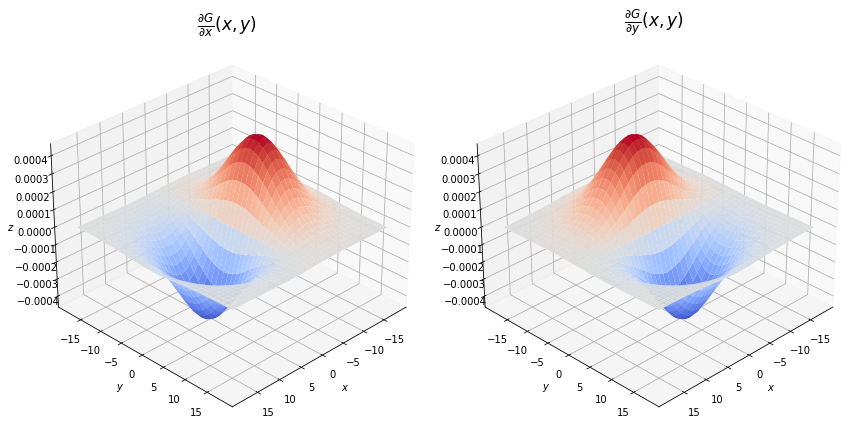

In [18]:
from mpl_toolkits.mplot3d import Axes3D
G_dx, G_dy = Deriv_Gauss_xy(6)
xx, yy = np.meshgrid(np.arange(-18,19), np.arange(-18,19))

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1, projection='3d')
ax2 = fig.add_subplot(1,2,2, projection='3d')

ax1.plot_surface(xx, yy, G_dx, cmap='coolwarm', edgecolor='none')
ax2.plot_surface(xx, yy, G_dy, cmap='coolwarm', edgecolor='none')
ax1.view_init(30,45), ax1.set_title(r'$\frac{\partial G}{\partial x}(x,y)$', size=17)
ax1.set_xlabel('$x$'), ax1.set_ylabel('$y$'), ax1.set_zlabel('$z$')
ax2.set_xlabel('$x$'), ax2.set_ylabel('$y$'), ax2.set_zlabel('$z$')
ax2.view_init(30,45), ax2.set_title(r'$\frac{\partial G}{\partial y}(x,y)$', size=17)
plt.tight_layout();

We continue by testing `canny` with different parameters. <br>
I'd say the best results occur in the 3rd and 4rth iterates.

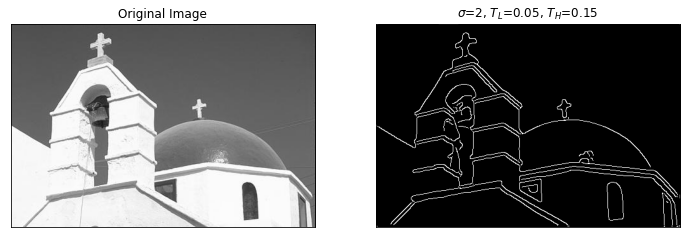

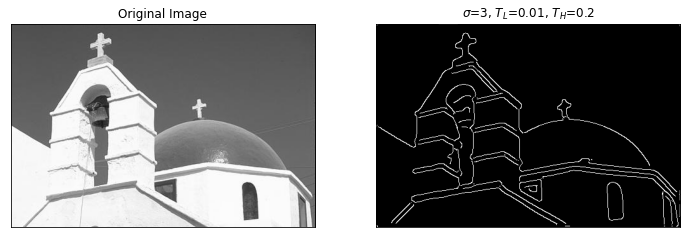

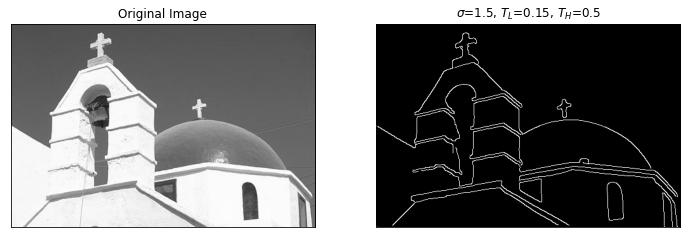

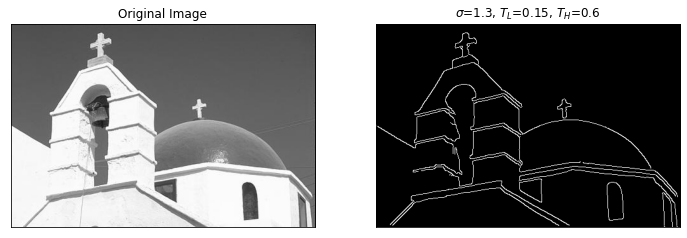

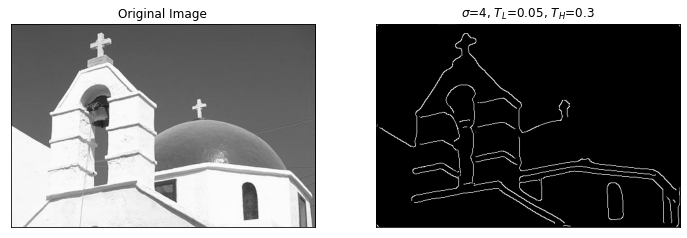

In [19]:
img = cv2.imread('images/Church.jpg')

for sig, l_th, h_th in [(2, 0.05, 0.15), (3, 0.01, 0.2), (1.5, 0.15, 0.5), (1.3,0.15,0.6), (4,0.05,0.3)]:
    E = canny('images/Church.jpg', sig, l_th, h_th)
    fig, ax = plt.subplots(1,2, figsize=(12,12), sharex=True, sharey=True)
    ax[0].imshow(img), ax[0].set_title('Original Image') 
    ax[1].imshow(E), ax[1].set_title(f'$\sigma$={sig}, $T_L$={l_th}, $T_H$={h_th}')
    plt.yticks([]), plt.xticks([])

Answering questions :
1. **False** - A bigger $\sigma$ implies a greater smoothing scale, which can affect the location of the real edges. In the example below, notice how the right cross gets so much smoothed, that it actually misses the real edge points.
2. **False** - A lower $T_L$ implies more entries in $E^{h-l}$, thus more valid labels in $C^{h-l}$ which means more connected components are added to $E^h$, resulting in longer edges. Remember that the "short" edges problem is present in Sobel's detector.
3. **True** - A higher $T_H$ implies less entries in $E^h$, thus less edges are present.
4. **True** - Just set $T_L=1$ for $E_1$ to have no edges at all (nothing can surpass that threshold) , and some arbitrary parameters for $E_2$ to show edges (like previous examples).

Example 1:

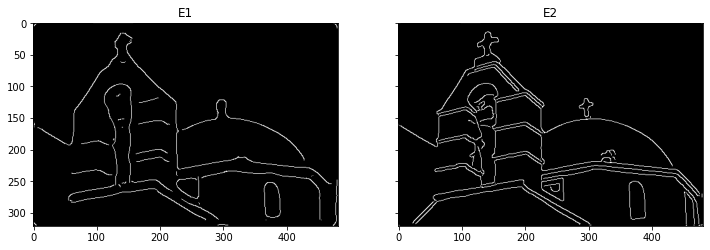

In [20]:
E1 = canny('images/Church.jpg', 6, 0.05, 0.2)
E2 = canny('images/Church.jpg', 2, 0.05, 0.2)
fig, ax = plt.subplots(1,2, figsize=(12,12), sharex=True, sharey=True)
ax[0].imshow(E1), ax[0].set_title('E1')
ax[1].imshow(E2), ax[1].set_title('E2');

Example 2:

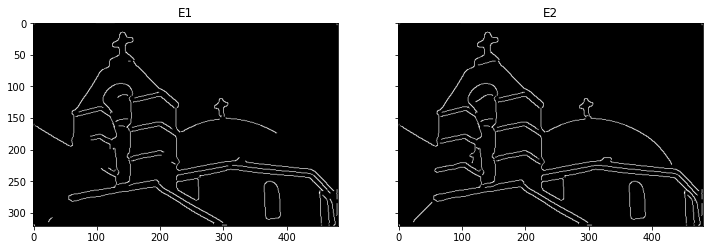

In [21]:
E1 = canny('images/Church.jpg', 3, 0.25, 0.3)
E2 = canny('images/Church.jpg', 3, 0.04, 0.3)
fig, ax = plt.subplots(1,2, figsize=(12,12), sharex=True, sharey=True)
ax[0].imshow(E1), ax[0].set_title('E1')
ax[1].imshow(E2), ax[1].set_title('E2');

Example 3:

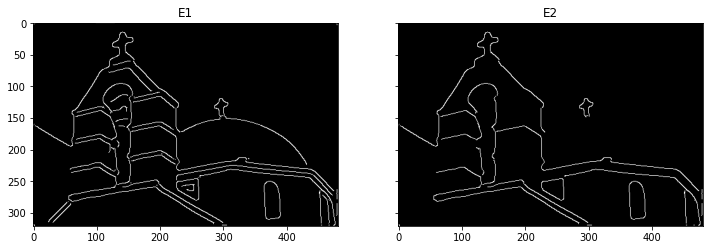

In [22]:
E1 = canny('images/Church.jpg', 3, 0.1, 0.2)
E2 = canny('images/Church.jpg', 3, 0.1, 0.5)
fig, ax = plt.subplots(1,2, figsize=(12,12), sharex=True, sharey=True)
ax[0].imshow(E1), ax[0].set_title('E1')
ax[1].imshow(E2), ax[1].set_title('E2');

Example 4:

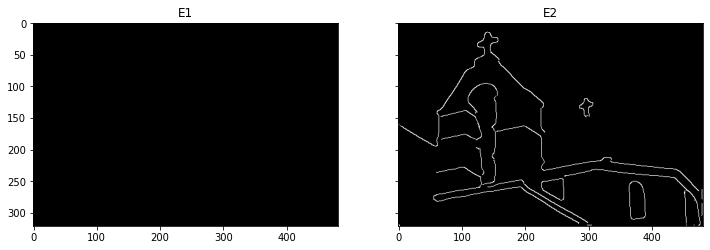

In [23]:
E1 = canny('images/Church.jpg', 3, 1, 1)
E2 = canny('images/Church.jpg', 3, 0.1, 0.5)
fig, ax = plt.subplots(1,2, figsize=(12,12), sharex=True, sharey=True)
ax[0].imshow(E1), ax[0].set_title('E1')
ax[1].imshow(E2), ax[1].set_title('E2');

We define and implement Sobel's edge detector as `SobelEdge`.

In [24]:
def SobelEdge(imageName, th):
    assert (0 <= th <= 1), 'Threshold must lay between 0 and 1' 
    img = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)
    Dx = np.array([[1,0,-1]])
    smoother = np.array([[1,2,1]])
    
    G_dx = convolve2d(Dx, smoother.T, mode='full')
    G_dy = convolve2d(Dx.T, smoother, mode='full')
    
    Ix = convolve2d(img, G_dx, mode='same')
    Iy = convolve2d(img, G_dy, mode='same')
    G_mag = np.sqrt(Ix**2 + Iy**2)
    G_mag /= G_mag.max()  # Normalize between 0 and 1
    return cv2.threshold(G_mag, th, 1, cv2.THRESH_BINARY)[1]

Sobel's edge detector tends to have thick and imcomplete edges, while Canny's algorithm takes care of these problems, using the sub-functions we defined in `Canny`.

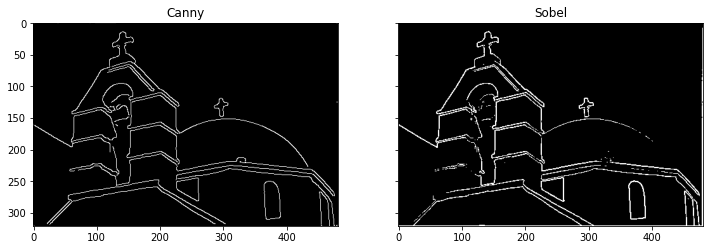

In [25]:
E1 = canny('images/Church.jpg', 1.6, 0.15, 0.3)
E2 = SobelEdge('images/Church.jpg', 0.3)
fig, ax = plt.subplots(1,2, figsize=(12,12), sharex=True, sharey=True)
ax[0].imshow(E1), ax[0].set_title('Canny')
ax[1].imshow(E2), ax[1].set_title('Sobel');

In general sense, Canny's algorithm can be parallelized in most of his phases, especially matrix operations. For example, consider the thinning phase, where we need to check the corresponding neighbors of each magnitude according to his direction. Checking them in a parallelized matter, will probably result in a better running time.

## Section C:  Hough transform for detecting straight lines
Hough Transform  (34 pt) 

In this section, you will learn how to find straight lines in an edge image using hough transform  [Duda and Hart, 1972](http://www.ai.sri.com/pubs/files/tn036-duda71.pdf). 

The basic idea is to use voting process for detecting all possible straight lines within the edge map of an image, despite outliers and imperfect straight lines. You can implement it yourself or use the implementation from  https://alyssaq.github.io/2014/understanding-hough-transform/ \
(Use the basic hough transform and not its extensions.)

1. (7pt) Apply the hough transform to images: "linesOnTheRoadGray.jpg"
 <img src="linesOnTheRoadGray.jpg" style="margin-left:auto; margin-right:auto; width: 200px;"/>

2. (10pt) Write a function that computes the  longest straight line in an image, and display it overlay on the original image.\
    **length = longest_straight_line(img, paramerts).** 
3. (10pt) Suggest an algorithm that detects the dashed and the solide road lines from a road image. Give a high level description of your algorithm.\
4. (7pt)Implement the algorithm you suggested in 3 and show its results on the given image. 
**Hint:** Pay attention to how many edges you expect on each part of the line.

In [26]:
def hough_line(img, angle_spread=1):

    # Rho and Theta ranges
    thetas = np.deg2rad(np.arange(-90.0, 90.0, angle_spread))
    width, height = img.shape
    diag_len = int(np.ceil(np.sqrt(width * width + height * height)))
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2)

    # Cache some resuable values
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    num_thetas = len(thetas)

    # Hough accumulator array of theta vs rho
    accumulator = np.zeros((2 * diag_len, num_thetas), dtype=np.uint64)
    y_idxs, x_idxs = np.nonzero(img)  # (row, col) indexes to edges

    # Vote in the hough accumulator
    for i in range(len(x_idxs)):
        x = x_idxs[i]
        y = y_idxs[i]

        for t_idx in range(num_thetas):
            # Calculate rho. diag_len is added for a positive index
            rho = round(x * cos_t[t_idx] + y * sin_t[t_idx]) + diag_len
            accumulator[rho, t_idx] += 1

    return accumulator, thetas, rhos

Applying Hough transform and plotting the Accumulation matrix:

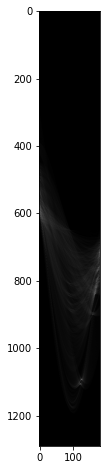

In [27]:
img2 = cv2.imread('images/linesOnTheRoadGray.jpg', cv2.IMREAD_GRAYSCALE)
hough = canny('images/linesOnTheRoadGray.jpg', 1.6, 0.1,0.25)
accumulator, thetas, rhos = hough_line(hough, 1)
plt.imshow(accumulator);

In [28]:
# Section C

def longest_straight_line(imageName, angle_spread=1):
    img = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)
    E = canny(imageName, 2.5, 0.1,0.25)
    accumulator, thetas, rhos = hough_line(E, angle_spread)
    
    idx = np.argmax(accumulator)
    rho = rhos[idx // accumulator.shape[1]]
    theta = thetas[idx % accumulator.shape[1]]
    
    x = np.arange(img.shape[1])
    y = -np.cos(theta) / np.sin(theta) * x  + rho / np.sin(theta) 
    
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.plot(x[y < img.shape[0]], y[y < img.shape[0]], color='r')
    return None

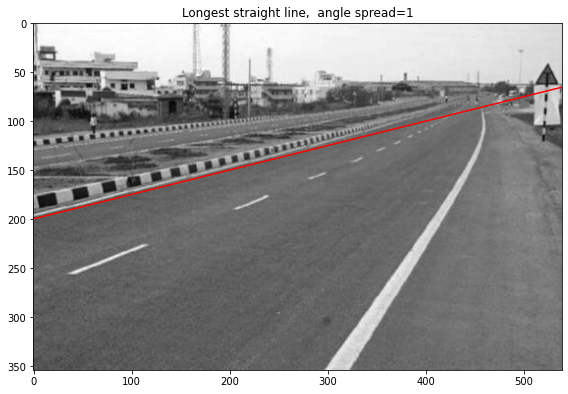

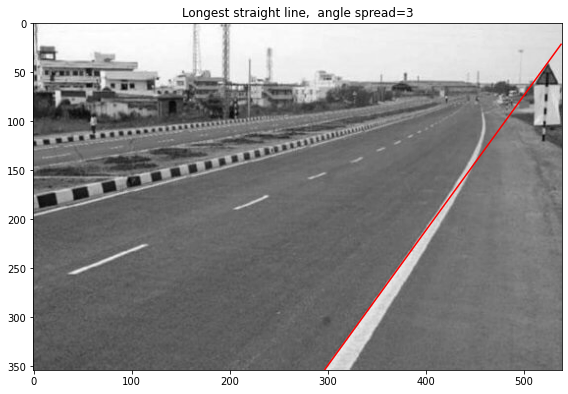

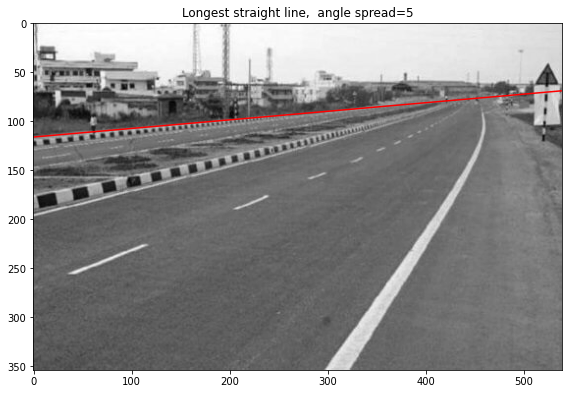

In [29]:
for angle_spread in (1, 3, 5):
    longest_straight_line('images\linesOnTheRoadGray.jpg', angle_spread)
    plt.title(f'Longest straight line,  angle spread={angle_spread}')
    plt.tight_layout()

#### Dashed lines detection
idea - After using canny's edge detection, we want to first eliminate the continuous lines. We do that by limiting the maximum number of connected components (we define them as at least a quarter of the diagonal length). We assume the lines have similar thickness because canny's algorithm narrows them, thus the connected components approach may hold. We also want to avoid accidental line detection formed by random dots, so we remove these points by limiting the minimum number of connected components.

A better implementation would be to detect the edges of a line and check the direction of the edges - for a dashed line we would expect corners. This implementation won't be done here.

Implementation - Just as in the longest straight line case, we've built a function to return the longest dashed line.



In [30]:
# Section C
def longest_dashed_line(imageName, angle_spread=1):
    img = cv2.imread(imageName, cv2.IMREAD_GRAYSCALE)
    E = canny(imageName, 2.5, 0.1,0.25)
    comps = cv2.connectedComponents(E.astype(np.uint8), connectivity=8)[1]
    vals, counts = np.unique(comps ,return_counts=True)
    width, height = img.shape
    max_len = int(np.ceil(np.sqrt(width * width + height * height)))
    
    # Remove continuous lines and too short dashes with respect to the image.
    comps[np.isin(comps,vals[(counts>max_len // 4) | (counts<max_len // 20)])] = 0
    
    accumulator, thetas, rhos = hough_line(comps, angle_spread)
    
    idx = np.argmax(accumulator)
    rho = rhos[idx // accumulator.shape[1]]
    theta = thetas[idx % accumulator.shape[1]]
    
    x = np.arange(img.shape[1])
    y = -np.cos(theta) / np.sin(theta) * x  + rho / np.sin(theta) 
    
    fig, ax = plt.subplots()
    ax.imshow(img)
    ax.plot(x[y < img.shape[0]], y[y < img.shape[0]], color='r')
    return None

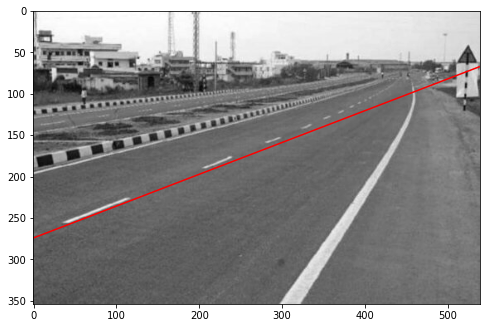

In [31]:
longest_dashed_line('images/linesOnTheRoadGray.jpg')

In [32]:
# This code is for the TA - you might want to use it for your debugging

if __name__ == "__main__":
    #test A
    imageName = './images/cameraman.jpg'
    test_A(imageName)

    synthName = './images/synthCheck.tif'
    test_A(synthName)
    
    #test B
    imageName = './images/Church.jpg'
    sigma, L_th, H_th  = 1.3, 0.1 , 0.15
    resultCanny = canny(imageName,sigma, L_th, H_th)